# Boosting in Practice

Let's look at an example of using a gradient boosted tree model to enhance the performance of weak learners by combining them into an ensemble.

In [1]:
# Import the Dependencies
import pandas as pd
from path import Path

# Load data
file_path = Path("../Resources/loans_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()



,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


A preview of the DataFrame reveals that the dataset again contains information on loan applications. The bad column is the target column, with 0 indicating a good loan application and 1 indicating a bad loan application.

In [2]:
# Define features set, Seperate the feature columns from the target column
X = loans_df.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [3]:
# Define target vector
y = loans_df["bad"].values

Next, split the dataset into training and testing sets. Again, the random_state argument is optional.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)


The data is scaled in the next step. Scaling is typically necessary when using models that calculate distances between data points, such as SVM. While not strictly required for tree-based models, it can be a good idea to scale the data, especially when comparing the performances of different models.

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In the next step, a for loop is used to identify the learning rate that yields the best performance.

In [5]:
# identify the learning rate that yields the best performance

from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.627
Accuracy score (validation): 0.520

Learning rate:  0.1
Accuracy score (training): 0.667
Accuracy score (validation): 0.528

Learning rate:  0.25
Accuracy score (training): 0.723
Accuracy score (validation): 0.536

Learning rate:  0.5
Accuracy score (training): 0.755
Accuracy score (validation): 0.560

Learning rate:  0.75
Accuracy score (training): 0.781
Accuracy score (validation): 0.520

Learning rate:  1
Accuracy score (training): 0.792
Accuracy score (validation): 0.480



The GradientBoostingClassifier includes the following:

An array called learning_rates is manually created and contains a range of values.

For each learning rate value, a GradientBoostingClassifier model is instantiated.

The max_depth argument refers to the size of the decision tree stumps used in gradient boosting.

The n_estimators argument refers to the number of trees used.

The n_estimators, max_features, and max_depth parameters are fixed at the defined values. These, like the learning rate, can be optimized, but we'll stick to the default values used in the example above.

During each iteration of the for loop, the accuracy scores of the training and testing sets are also printed for each learning rate.

Previously, we used Scikit-learn's accuracy_score module to validate a model. The method used here is classifier.score(), which yields the same result.

Of the learning rates used, 0.5 yields the best accuracy score for the testing set and a high accuracy score for the training set. This is the value we'll implement in the final model. Also, note that the testing accuracy is more important here than the training accuracy.

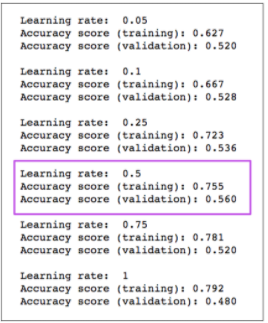

A model that performs well on the training set but poorly on the testing set is said to be "overfit." Overfitting is akin to memorizing the answers to an exam: It will help on that particular exam, but not on any others. In other words, overfitting occurs when a model gives undue importance to patterns within a particular dataset that are not found in other, similar datasets. Instead of learning a general pattern that can be applied to other similar datasets, it learns the patterns specific to one dataset.

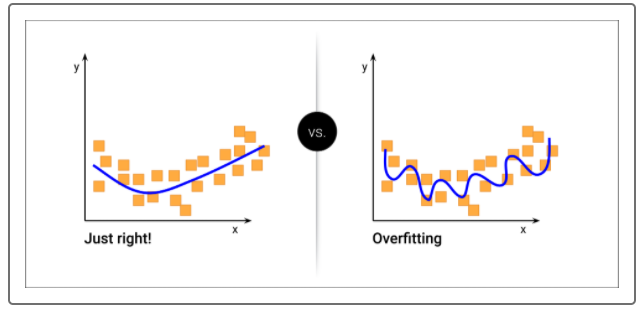

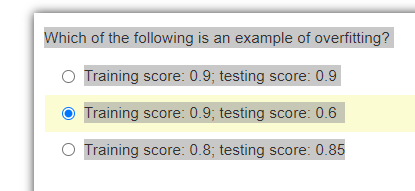

Using the learning_rate value obtained from the for loop, we instantiate a model, train it, then create predictions.

In [6]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1
5,1,1
6,0,1
7,0,0
8,0,0
9,0,0


Having created predictions with the gradient boosted tree model, we can assess the model's performance. This time, the accuracy_score() method is used.

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.56


Predictably, the accuracy_score() method returns the same score as that of the classifier.score()method.

Accuracy Score: 0.56

Next, we generate a confusion_matrix of the results.

In [8]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,49,16
Actual 1,39,21


Finally, we can generate a classification report to evaluate the precision, recall, and F1 scores.

In [9]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        65
           1       0.57      0.35      0.43        60

    accuracy                           0.56       125
   macro avg       0.56      0.55      0.54       125
weighted avg       0.56      0.56      0.54       125

